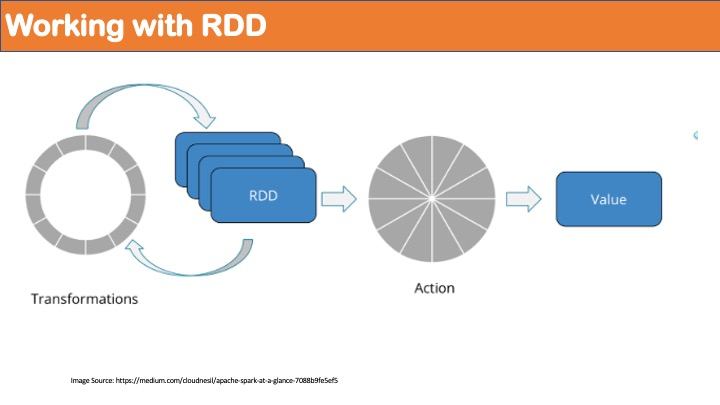

In [5]:
from IPython.display import Image
Image(filename='RDD_Intro.jpg')

In [2]:
import findspark
findspark.init('C:\spark-3.0.3-bin-hadoop2.7\spark-3.0.3-bin-hadoop2.7')

In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
sc.stop()

In [4]:
sc=SparkContext('local[4]','HM')

In [5]:
sc

<SparkContext master=local[4] appName=HM>

In [6]:
spark=SparkSession(sc)

In [7]:
spark

In [8]:
num=sc.parallelize([5,5,4,3,2,9,2],9)

In [9]:
num.glom().collect()

[[], [5], [5], [4], [], [3], [2], [9], [2]]

In [10]:
type(num)

pyspark.rdd.RDD

In [11]:
type(num.glom())

pyspark.rdd.PipelinedRDD

In [12]:
num.take(4)

[5, 5, 4, 3]

In [13]:
num.takeOrdered(3)

[2, 2, 3]

In [15]:
num.top(3)

[9, 5, 5]

In [22]:
num.max()

9

In [23]:
num.min()

2

In [24]:
num.mean()

4.285714285714286

In [25]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [40]:
#reduce() 
num.reduce(lambda a,b:a*b)

10800

In [27]:
from operator import add
num.reduce(add)

30

In [30]:
def maximum(a,b):
    if a>b:
        return a
    else:
        return b

In [31]:
num.reduce(maximum)

9

In [32]:
num.reduce(lambda x,y: x if x>y else y)

9

In [14]:
num=sc.parallelize([5,5,4,3,2,9,2],2)

In [34]:
num.glom().collect()

[[5, 5, 4], [3, 2, 9, 2]]

In [35]:
num.reduce(lambda a,b:a+b)


30

In [15]:
num.fold(0,lambda a,b:a+b)

30

In [37]:
num.fold(1,lambda a,b:a+b)

33

In [38]:
num.fold(2,lambda a,b:a+b)

36

In [42]:
num.fold(2,lambda a,b:a*b)

86400

In [ ]:
# RDD Transforamtions
        lazy( not computed immediately)
         RDD is excuted when action runs on it

In [14]:
text=['Apache spark','spark','python','spark','scala']

In [15]:
text_bigdata=sc.parallelize(text)

In [16]:
text_bigdata.glom().collect()

[['Apache spark'], ['spark'], ['python'], ['spark', 'scala']]

In [17]:
lines=text_bigdata.filter(lambda line:'spark' in line)

In [18]:
type(lines)

pyspark.rdd.PipelinedRDD

In [19]:
lines

PythonRDD[8] at RDD at PythonRDD.scala:53

In [20]:
lines.collect()

['Apache spark', 'spark', 'spark']

In [21]:
lines.count()

3

In [22]:
type(lines)

pyspark.rdd.PipelinedRDD

In [23]:
lines.first()

'Apache spark'

In [53]:
lines

PythonRDD[27] at RDD at PythonRDD.scala:53

In [1]:
import findspark
findspark.init('C:\spark-3.0.3-bin-hadoop2.7\spark-3.0.3-bin-hadoop2.7')

In [24]:
from pyspark.sql import SparkSession

In [25]:
spark.stop()

In [26]:
spark=SparkSession.builder.master('local').appName('narrow').getOrCreate()

In [27]:
sc=spark.sparkContext

In [28]:
num=sc.parallelize([5,5,4,3,2,9,2])

In [29]:
num.glom().collect()

[[5, 5, 4, 3, 2, 9, 2]]

In [8]:
num.map(lambda a:a*2).collect()

[10, 10, 8, 6, 4, 18, 4]

In [32]:
names=sc.parallelize(['Bai','Muthu','Mani','Bee'],2)

In [33]:
names.glom().collect()

[['Bai', 'Muthu'], ['Mani', 'Bee']]

In [14]:
names.map(lambda a:"Mr."+a).collect()

['Mr.Bai', 'Mr.Muthu', 'Mr.Mani', 'Mr.Bee']

In [34]:
# Flatmap
rdd=sc.parallelize([2,3,4])

In [35]:
rdd.collect()

[2, 3, 4]

In [36]:
a=range(1,3)
for i in a:
    print(i)

1
2


In [18]:
rdd.flatMap(lambda x:range(1,x)).collect()

[1, 1, 2, 1, 2, 3]

In [38]:
# Diff Map vs Flatmap
in_rdd=sc.textFile('mapvsflat.csv')

In [39]:
in_rdd.collect()

['101,Muthu,SP', '102,Pradeep,SSE', '103,kannan,IT', '104,ranjith,SPM']

In [40]:
in_rdd.count()

4

In [25]:
map_rdd=in_rdd.map(lambda x:x.split(','))

In [26]:
map_rdd.collect()

[['101', 'Muthu', 'SP'],
 ['102', 'Pradeep', 'SSE'],
 ['103', 'kannan', 'IT'],
 ['104', 'ranjith', 'SPM']]

In [31]:
df=in_rdd.map(lambda x:x.split(',')).toDF()

In [32]:
df.show()

+---+-------+---+
| _1|     _2| _3|
+---+-------+---+
|101|  Muthu| SP|
|102|Pradeep|SSE|
|103| kannan| IT|
|104|ranjith|SPM|
+---+-------+---+



In [37]:
flat_map=in_rdd.flatMap(lambda x:x.split(','))

In [34]:
in_rdd.collect()

['101,Muthu,SP', '102,Pradeep,SSE', '103,kannan,IT', '104,ranjith,SPM']

In [35]:
flat_map.collect()

['101',
 'Muthu',
 'SP',
 '102',
 'Pradeep',
 'SSE',
 '103',
 'kannan',
 'IT',
 '104',
 'ranjith',
 'SPM']

In [38]:
from pyspark.sql.types import StringType
df=spark.createDataFrame(flat_map,StringType())
df.show()

+-------+
|  value|
+-------+
|    101|
|  Muthu|
|     SP|
|    102|
|Pradeep|
|    SSE|
|    103|
| kannan|
|     IT|
|    104|
|ranjith|
|    SPM|
+-------+



In [42]:
in_two_rdd=sc.textFile('cars.csv')

In [43]:
in_two_rdd.collect()

['Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin',
 'Chevrolet Chevelle Malibu;18.0;8;307.0;130.0;3504.;12.0;70;US',
 'Buick Skylark 320;15.0;8;350.0;165.0;3693.;11.5;70;US',
 'Plymouth Satellite;18.0;8;318.0;150.0;3436.;11.0;70;US',
 'AMC Rebel SST;16.0;8;304.0;150.0;3433.;12.0;70;US',
 'Ford Torino;17.0;8;302.0;140.0;3449.;10.5;70;US',
 'Ford Galaxie 500;15.0;8;429.0;198.0;4341.;10.0;70;US',
 'Chevrolet Impala;14.0;8;454.0;220.0;4354.;9.0;70;US',
 'Plymouth Fury iii;14.0;8;440.0;215.0;4312.;8.5;70;US',
 'Pontiac Catalina;14.0;8;455.0;225.0;4425.;10.0;70;US',
 'AMC Ambassador DPL;15.0;8;390.0;190.0;3850.;8.5;70;US',
 'Citroen DS-21 Pallas;0;4;133.0;115.0;3090.;17.5;70;Europe',
 'Chevrolet Chevelle Concours (sw);0;8;350.0;165.0;4142.;11.5;70;US',
 'Ford Torino (sw);0;8;351.0;153.0;4034.;11.0;70;US',
 'Plymouth Satellite (sw);0;8;383.0;175.0;4166.;10.5;70;US',
 'AMC Rebel SST (sw);0;8;360.0;175.0;3850.;11.0;70;US',
 'Dodge Challenger SE;15.0;8;383.0;170.0;356

In [44]:
flat_map=in_two_rdd.flatMap(lambda x:x.split(';'))

In [45]:
from pyspark.sql.types import StringType
df=spark.createDataFrame(flat_map,StringType())
df.show()

+--------------------+
|               value|
+--------------------+
|                 Car|
|                 MPG|
|           Cylinders|
|        Displacement|
|          Horsepower|
|              Weight|
|        Acceleration|
|               Model|
|              Origin|
|Chevrolet Chevell...|
|                18.0|
|                   8|
|               307.0|
|               130.0|
|               3504.|
|                12.0|
|                  70|
|                  US|
|   Buick Skylark 320|
|                15.0|
+--------------------+
only showing top 20 rows



In [46]:
data=["Hello world","Apache spark is awesome","Learning Pyspark"]
rdd=spark.sparkContext.parallelize(data)

In [48]:
words=rdd.map(lambda sentence:sentence.split(" "))

In [49]:
words.collect()

[['Hello', 'world'],
 ['Apache', 'spark', 'is', 'awesome'],
 ['Learning', 'Pyspark']]

In [50]:
words=rdd.flatMap(lambda sentence:sentence.split(" "))
words.collect()

['Hello', 'world', 'Apache', 'spark', 'is', 'awesome', 'Learning', 'Pyspark']

In [ ]:
# Map Partition
             Returns a new RDD - each partition - function apply - value get

In [51]:
map_pa_rdd=sc.parallelize([1,2,1,1,2,1,1,2,1],3)

In [52]:
map_pa_rdd.getNumPartitions()

3

In [53]:
map_pa_rdd.glom().collect()

[[1, 2, 1], [1, 2, 1], [1, 2, 1]]

In [56]:
def process_partition(partition):
    yield max(partition)

In [57]:
num_process_rdd=map_pa_rdd.mapPartitions(process_partition)

In [58]:
num_process_rdd.collect()

[2, 2, 2]

In [65]:
input_path='C:/Users/JOHNJESUS/OneDrive/Desktop/input'

In [66]:
file_rdd=sc.textFile(input_path)

In [67]:
file_rdd.collect()

['python',
 'java',
 'spark',
 'anaconda',
 'apache',
 'scala',
 'hi hello',
 'how are you',
 'I am fine']

In [68]:
file_rdd.glom().collect()

[['python', 'java', 'spark', 'anaconda', 'apache', 'scala'],
 ['hi hello', 'how are you', 'I am fine']]

In [69]:
def process_part_size(partition):
    element_list=[]
    for element in partition:
        element_list.append(len(element))
    yield element_list

In [70]:
tech_rdd=file_rdd.mapPartitions(process_part_size)

In [71]:
tech_rdd.collect()

[[6, 4, 5, 8, 6, 5], [8, 11, 9]]

In [8]:
# filter
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [9]:
num.filter(lambda x:x%2==0).collect()

[4, 2, 2]

In [10]:
names.collect()

['Bai', 'Muthu', 'Mani', 'Bee']

In [11]:
names.filter(lambda x:'B' in x).collect()

['Bai', 'Bee']

In [59]:
# union
list_one=[1,2,3,4,5,5]
list_two=[6,7,8,9,10]
rdd_one=sc.parallelize(list_one,3)
rdd_two=sc.parallelize(list_two,2)

In [60]:
union_rdd=rdd_one.union(rdd_two)

In [61]:
union_rdd.collect()

[1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10]

In [102]:
#sample
list_one=[1,2,3,4,5,6,7,8,9,10]

In [103]:
rdd=sc.parallelize(list_one,3)

In [104]:
rdd.glom().collect()

[[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

In [105]:
rdd=rdd.sample(False,0.3)

In [107]:
rdd.collect()

[1, 2, 5]

In [70]:
# sample customer data
data=[('C1',"john"),('C2',"joe"),('C3',"Raj"),('C4',"joha"),('C5',"raja")]

rdd=spark.sparkContext.parallelize(data)

# Narrow transformation using sample to get 30% of data
sample_rdd=rdd.sample(False,0.3)

In [71]:
sample_rdd.collect()

[('C2', 'joe'), ('C3', 'Raj'), ('C4', 'joha')]

In [108]:
# WIde transforamtion
# GroupBY
names.collect()

['Bai', 'Muthu', 'Mani', 'Bee']

In [109]:
names_group=names.groupBy(lambda x: x[0]).collect()

In [110]:
names_group

[('M', <pyspark.resultiterable.ResultIterable at 0x23867980550>),
 ('B', <pyspark.resultiterable.ResultIterable at 0x23867988510>)]

In [41]:
type(names_group)

list

In [43]:
for (k,v) in names_group:
    print(k,list(v))

B ['Bai', 'Bee']
M ['Muthu', 'Mani']


In [111]:
numbers=sc.parallelize([1,1,2,3,5,8])
numbers.collect()

[1, 1, 2, 3, 5, 8]

In [45]:
result=numbers.groupBy(lambda x:x%2).collect()

In [46]:
result

[(1, <pyspark.resultiterable.ResultIterable at 0x2bf450d3488>),
 (0, <pyspark.resultiterable.ResultIterable at 0x2bf450d3448>)]

In [47]:
for (k,v) in result:
    print(k,list(v))

1 [1, 1, 3, 5]
0 [2, 8]


In [112]:
# Intersection 
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [113]:
numbers.collect()

[1, 1, 2, 3, 5, 8]

In [50]:
num.intersection(numbers).collect()

[2, 5, 3]

In [51]:
num.subtract(numbers).collect()

[4, 9]

In [52]:
num.distinct().collect()

[5, 4, 3, 2, 9]

In [114]:
data=sc.parallelize([1,2,3,4,5])

In [115]:
data=sc.parallelize([(1,2),(3,4),(3,6),(3,4)])

In [116]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [117]:
data.count()

4

In [118]:
data.countByValue()

defaultdict(int, {(1, 2): 1, (3, 4): 2, (3, 6): 1})

In [119]:
datastr=sc.parallelize([(1,'mani'),(2,'joe'),(3,'muthu'),(4,'Ranjith')])

In [120]:
datastr.collect()

[(1, 'mani'), (2, 'joe'), (3, 'muthu'), (4, 'Ranjith')]

In [121]:
data.top(2)

[(3, 6), (3, 4)]

In [122]:
data.take(2)

[(1, 2), (3, 4)]

In [123]:
data.sortByKey().collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [125]:
data=[(101,"Laptop"),(105,"Smartphone"),(102,"Monitor"),(103,'Tablet')]
rdd=spark.sparkContext.parallelize(data)
sorted_rdd=rdd.sortByKey(ascending=False)
sorted_rdd.collect()

[(105, 'Smartphone'), (103, 'Tablet'), (102, 'Monitor'), (101, 'Laptop')]

In [65]:
# lookup : Retrun all value associated with the given key
data.lookup(3)

[4, 6, 4]

In [66]:
data.keys().collect()

[1, 3, 3, 3]

In [67]:
data.values().collect()

[2, 4, 6, 4]

In [68]:
data.mapValues(lambda a:a*a).collect()

[(1, 4), (3, 16), (3, 36), (3, 16)]

In [69]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [70]:
data.glom().collect()

[[(1, 2), (3, 4), (3, 6), (3, 4)]]

In [85]:
data.reduceByKey(max).collect()

[(1, 2), (3, 6)]

In [84]:
data

ParallelCollectionRDD[50] at readRDDFromFile at PythonRDD.scala:262

In [78]:
result=data.groupByKey().collect()
result

[(1, <pyspark.resultiterable.ResultIterable at 0x2bf450cbf48>),
 (3, <pyspark.resultiterable.ResultIterable at 0x2bf450cb908>)]

In [76]:
for (k,v) in result:
    print(k,list(v))

1 [2]
3 [4, 6, 4]


In [82]:
map_group=data.groupByKey().mapValues(max)

In [80]:
type(map_group)

pyspark.rdd.PipelinedRDD

In [83]:
map_group.collect()

[(1, 2), (3, 6)]

In [86]:
data.flatMapValues(lambda x:range(1,x)).collect()

[(1, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 1),
 (3, 2),
 (3, 3)]

In [ ]:
# SubtractByKey

In [87]:
# Join
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [89]:
data_two=sc.parallelize([(3,9),(4,15)])

In [90]:
data_two.collect()

[(3, 9), (4, 15)]

In [91]:
data.join(data_two).collect()

[(3, (4, 9)), (3, (6, 9)), (3, (4, 9))]

In [92]:
#rightouterJoin -
data.rightOuterJoin(data_two).collect()

[(4, (None, 15)), (3, (4, 9)), (3, (6, 9)), (3, (4, 9))]

In [94]:
data.leftOuterJoin(data_two).collect()

[(1, (2, None)), (3, (4, 9)), (3, (6, 9)), (3, (4, 9))]